Tutorial 1 https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

In [35]:
# Set plot size 
rcParams['figure.figsize'] = 10, 6

In [36]:
df = pd.read_csv('../Data/SalesData.csv', delimiter=',', header='infer', encoding='latin-1')
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df

Shape of the data=  (68636, 9)
Column datatypes= 
 Date        object
Month        int64
Quarter      int64
Year         int64
Qty          int64
Product     object
Category    object
Pharmacy    object
Location    object
dtype: object


,Date,Month,Quarter,Year,Qty,Product,Category,Pharmacy,Location
0,1-11-2015,11,4,2015,2,Injection 14,Skinbooster,Pharmacy 1,London
1,1-11-2015,11,4,2015,1,Injection 14,Skinbooster,Pharmacy 1,London
2,1-11-2015,11,4,2015,1,Injection 1,Dermafiller,Pharmacy 2,Outside London M25
3,1-11-2015,11,4,2015,1,Injection 2,Dermafiller,Pharmacy 2,Outside London M25
4,1-11-2015,11,4,2015,4,Injection 14,Skinbooster,Pharmacy 2,"NorthEast, Midlands"
...,...,...,...,...,...,...,...,...,...
68631,1-3-2022,3,1,2022,2,Facemask,Skincare,Pharmacy 5,"Scotland, Newcastle"
68632,1-3-2022,3,1,2022,1,Facemask,Skincare,Pharmacy 5,NorthWest
68633,1-3-2022,3,1,2022,1,Facemask,Skincare,Pharmacy 5,London
68634,1-3-2022,3,1,2022,1,Facemask,Skincare,Pharmacy 5,London


In [37]:
df = df[['Date', 'Qty']]

In [38]:
df.head()

,Date,Qty
0,1-11-2015,2
1,1-11-2015,1
2,1-11-2015,1
3,1-11-2015,1
4,1-11-2015,4


In [39]:
df = df.groupby(['Date'],as_index=False)['Qty'].agg("sum")
print(df)

        Date    Qty
0   1-1-2016     76
1   1-1-2017    328
2   1-1-2018   2328
3   1-1-2019   4948
4   1-1-2020   6204
..       ...    ...
72  1-9-2017   1234
73  1-9-2018   4642
74  1-9-2019   6613
75  1-9-2020  10034
76  1-9-2021  12261

[77 rows x 2 columns]


In [40]:
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)

Shape of the data=  (77, 2)
Column datatypes= 
 Date    object
Qty      int64
dtype: object


In [41]:
df['Date'] = pd.to_datetime(df.Date, format="%d-%m-%Y")
df = df.sort_values(by='Date')
df = df.set_index(df.Date)
df.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df
#df['Date'] = pd.to_datetime(df.Date, format="%d-%m-%Y")

Column datatypes= 
 Qty    int64
dtype: object


,Qty
Date,
2015-11-01,9
2015-12-01,35
2016-01-01,76
2016-02-01,59
2016-03-01,144
...,...
2021-11-01,19099
2021-12-01,11719
2022-01-01,14598


In [19]:
#df = df.sort_values(by='Date')
#df.head()

,Date,Qty
13,2015-11-01,9
20,2015-12-01,35
0,2016-01-01,76
27,2016-02-01,59
34,2016-03-01,144


Text(0.5, 1.0, 'Trend of the Time Series')

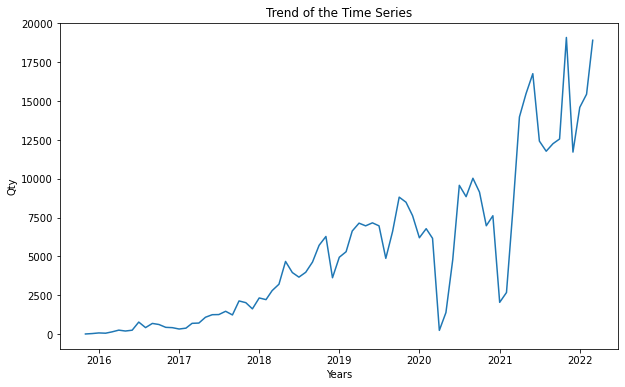

In [43]:
#To plot trend
plt.figure(figsize= (10,6))
plt.plot(df.index, df['Qty'])
plt.xlabel('Years')
plt.ylabel('Qty')
plt.title('Trend of the Time Series')

<AxesSubplot:title={'center':'Seasonality of the Time Series'}, xlabel='Month', ylabel='Qty'>

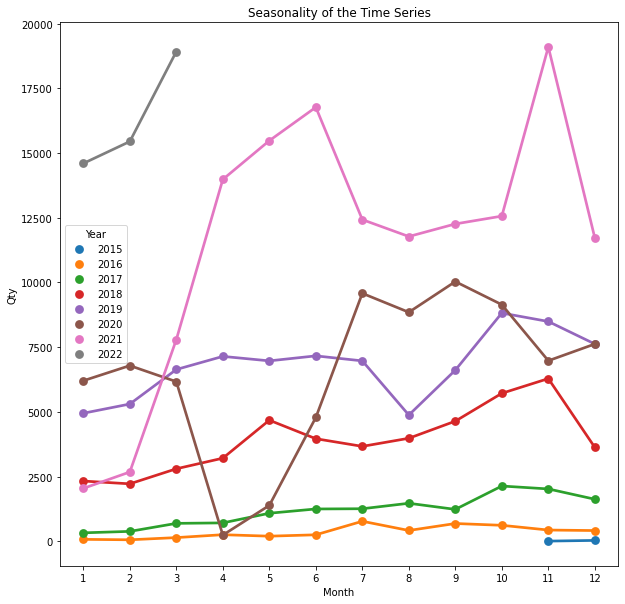

In [44]:
#To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Qty',hue='Year',data=df_temp)
# df_temp = df.copy()
# df_temp['Year'] = pd.DatetimeIndex(df_temp['Date']).year
# df_temp['Month'] = pd.DatetimeIndex(df_temp['Date']).month
# # Stacked line plot
# plt.figure(figsize=(10,10))
# plt.title('Seasonality of the Time Series')
# sns.pointplot(x='Month',y='Qty',hue='Year',data=df_temp)

In [110]:
#df.sort_index(inplace=True)

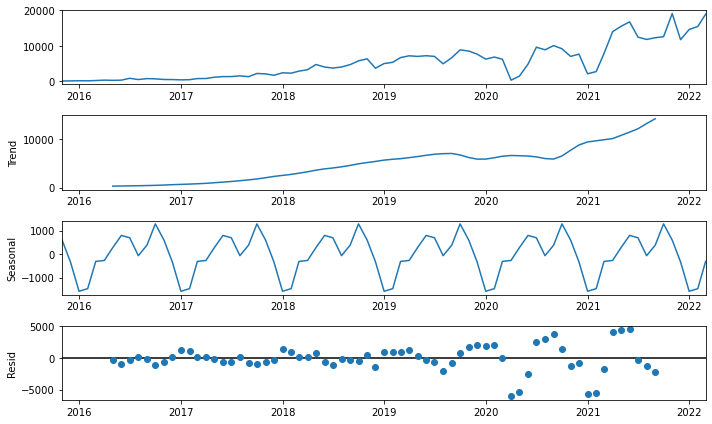

In [45]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

In [46]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('Qty')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

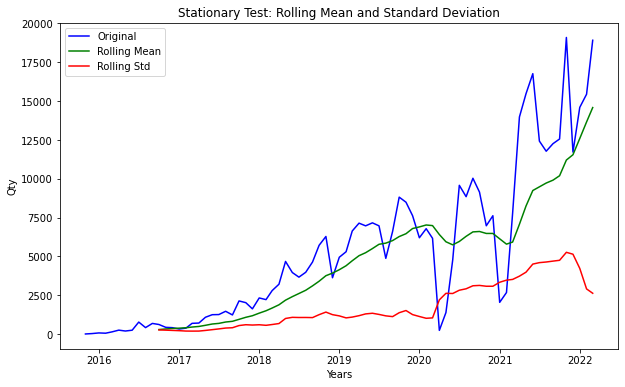

Results of Dickey-Fuller Test
Test Statistic                  0.479266
p-value                         0.984229
#Lags Used                     11.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


In [47]:
# Lets test the stationarity score with original series data
stationarity_test(df)

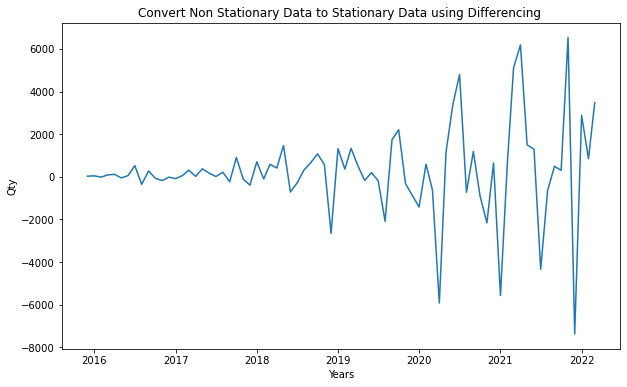

In [48]:
df_diff = df.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('Qty')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

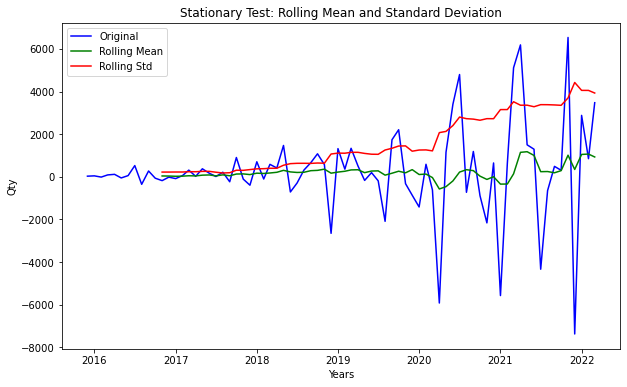

Results of Dickey-Fuller Test
Test Statistic                 -2.086567
p-value                         0.249950
#Lags Used                     10.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


In [49]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

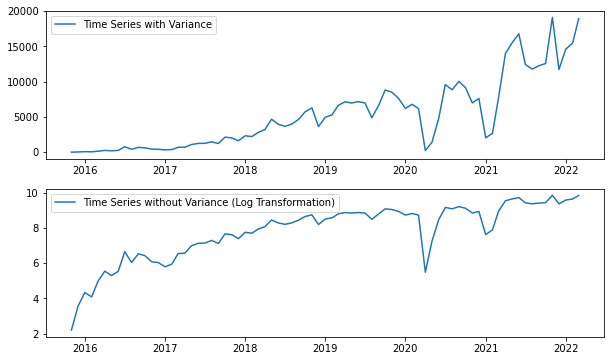

In [50]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

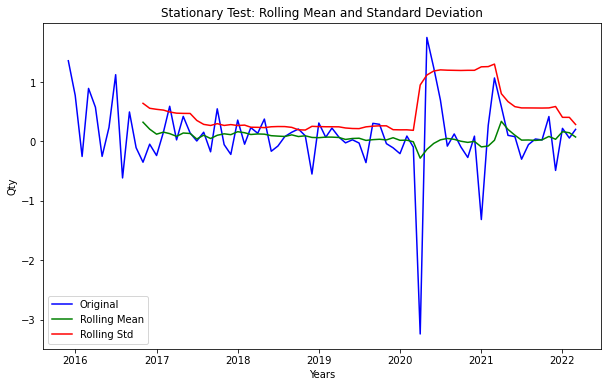

Results of Dickey-Fuller Test
Test Statistic                 -4.906770
p-value                         0.000034
#Lags Used                      6.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [51]:
df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

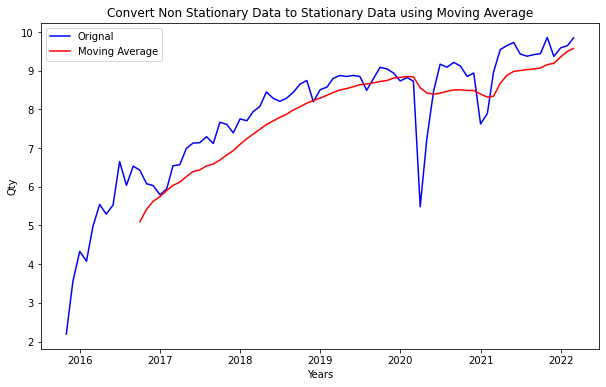

In [52]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('Qty')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

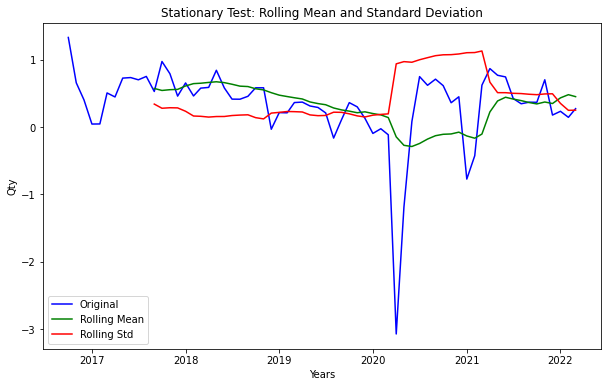

Results of Dickey-Fuller Test
Test Statistic                 -4.680221
p-value                         0.000092
#Lags Used                      0.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


In [53]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

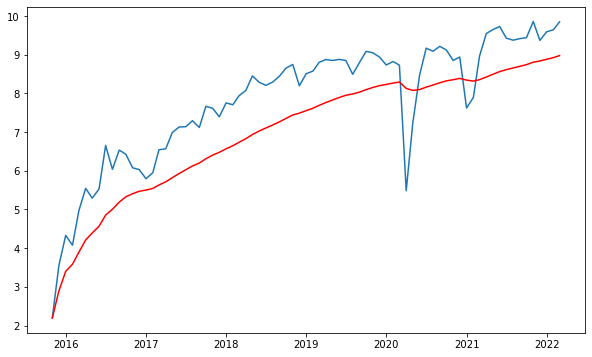

In [54]:
df_log_weighted_avg = df_log.ewm(halflife = 12).mean()
plt.plot(df_log)
plt.plot(df_log_weighted_avg, color = 'red')

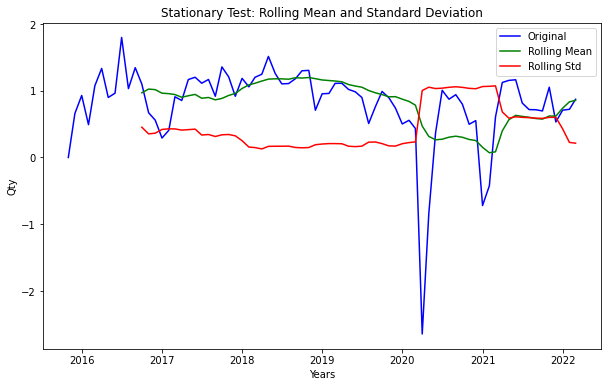

Results of Dickey-Fuller Test
Test Statistic                 -4.739538
p-value                         0.000071
#Lags Used                      0.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


In [55]:
df_log_weighted_avg_diff = df_log - df_log_weighted_avg
stationarity_test(df_log_weighted_avg_diff)

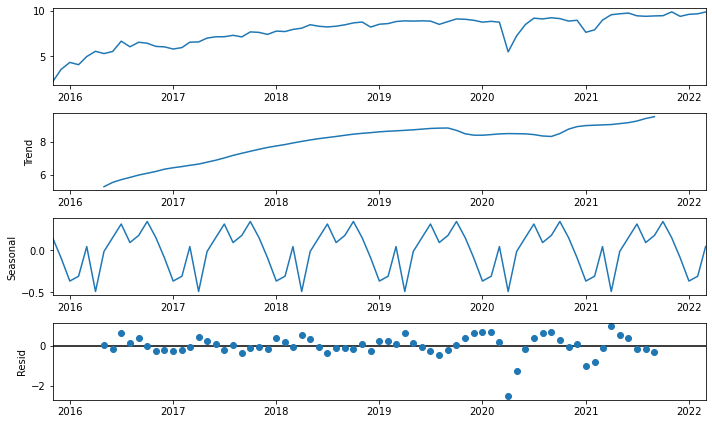

In [56]:
decomposition = sm.tsa.seasonal_decompose(df_log,period =12)
fig = decomposition.plot()

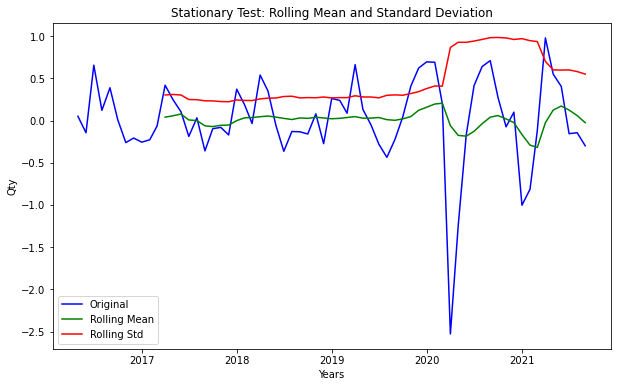

Results of Dickey-Fuller Test
Test Statistic                 -5.613849
p-value                         0.000001
#Lags Used                      6.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [57]:
df_log_residual = decomposition.resid
df_log_residual.dropna(inplace = True)
stationarity_test(df_log_residual)

c:\Users\galea\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


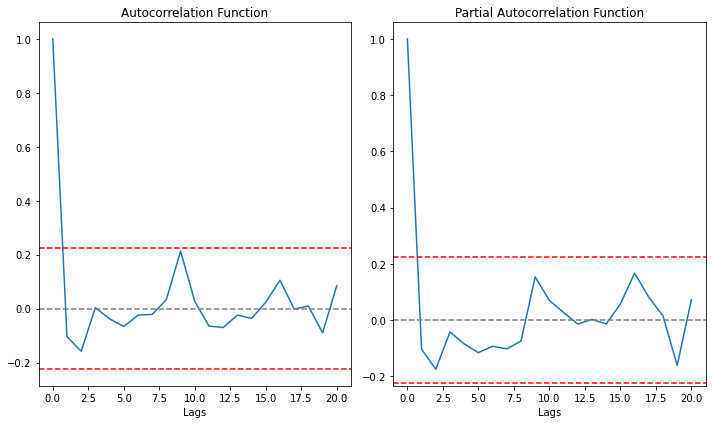

In [58]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\Users\galea\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Text(0.5, 1.0, 'AR Model, RSS: 25.8447')

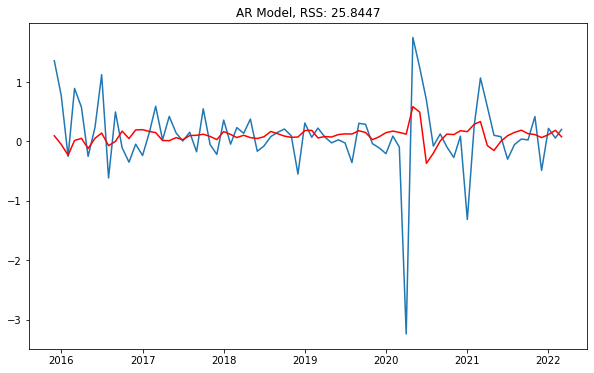

In [59]:
# freq = 'MS' > The frequency of the time-series MS = calendar month begin
# The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use
model = ARIMA(df_log, order=(2, 1, 0), freq = 'MS')  
results_AR = model.fit(disp= -1)# If disp < 0 convergence information will not be printed
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model, RSS: %.4f'% sum((results_AR.fittedvalues - df_log_diff['Qty'])**2))

Text(0.5, 1.0, 'MA Model, RSS: 25.5029')

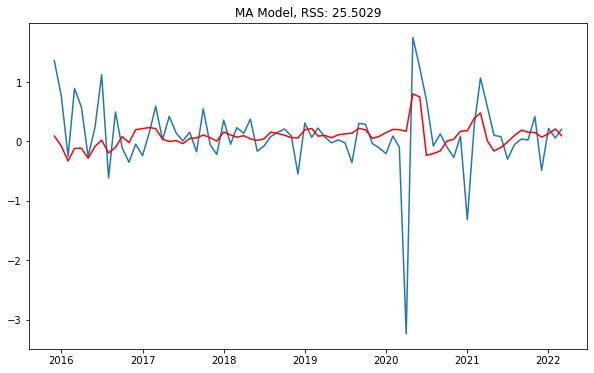

In [63]:
model = ARIMA(df_log, order=(0, 1, 2), freq = 'MS')  
results_MA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model, RSS: %.4f'% sum((results_MA.fittedvalues-df_log_diff['Qty'])**2))

In [61]:
model = ARIMA(df_log, order=(2, 1, 2), freq = 'MS')  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('Combined Model, RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff['Qty'])**2))

c:\Users\galea\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


LinAlgError: SVD did not converge

In [64]:
# Create a separate series of predicted values
predictions_diff = pd.Series(results_MA.fittedvalues, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

Total no of predictions:  76


Date
2015-12-01    0.089611
2016-01-01   -0.073966
2016-02-01   -0.330293
2016-03-01   -0.117248
2016-04-01   -0.114307
dtype: float64

In [65]:
predictions_diff_cumsum = predictions_diff.cumsum()
predictions_diff_cumsum.head()

Date
2015-12-01    0.089611
2016-01-01    0.015645
2016-02-01   -0.314648
2016-03-01   -0.431896
2016-04-01   -0.546203
dtype: float64

In [66]:
predictions_log = pd.Series(df_log['Qty'].iloc[0], index=df_log.index) # Series of base number
predictions_log = predictions_log.add(predictions_diff_cumsum,fill_value=0)
predictions_log.head()

Date
2015-11-01    2.197225
2015-12-01    2.286835
2016-01-01    2.212870
2016-02-01    1.882576
2016-03-01    1.765329
dtype: float64

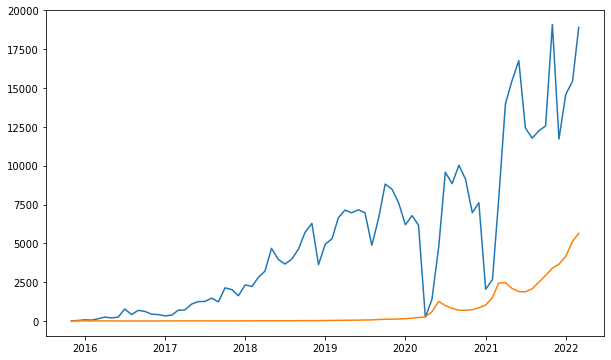

In [67]:
predictions = np.exp(predictions_log)
plt.plot(df)
plt.plot(predictions)

In [68]:
df_predictions =pd.DataFrame(predictions, columns=['Predicted Values'])
pd.concat([df,df_predictions],axis =1).T

Date,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,...,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01
Qty,9.0,35.000000,76.000000,59.000000,144.000000,256.000000,199.000000,252.000000,775.000000,419.000000,...,16768.000000,12427.000000,11775.000000,12261.000000,12563.000000,19099.000000,11719.000000,14598.000000,15445.000000,18919.000000
Predicted Values,9.0,9.843737,9.141912,6.570411,5.843493,5.212301,3.923947,3.604545,3.683996,3.031772,...,1897.452471,1880.719241,2077.892672,2511.434364,2932.721705,3409.186341,3661.689135,4164.166463,5135.399054,5652.625851


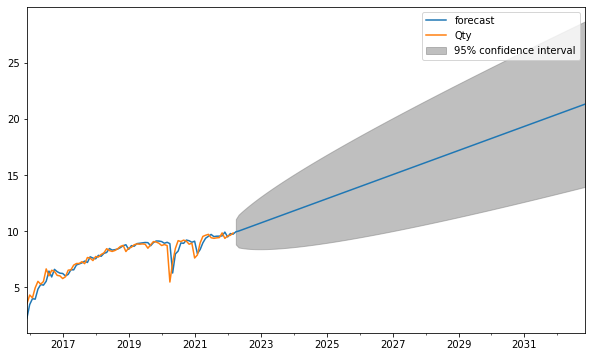

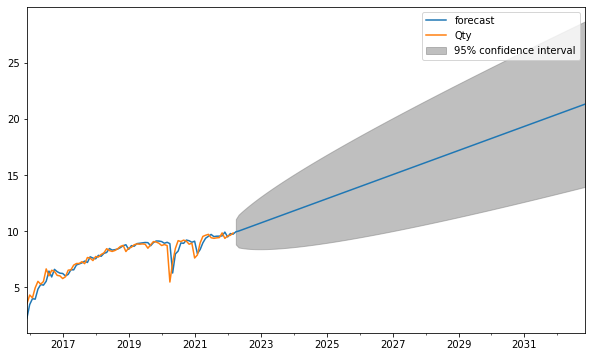

In [69]:
results_MA.plot_predict(start = 1, end= 204) 

In [72]:
# Forecasted values in original scale will be
forecast_values_log_scale = results_MA.forecast(steps = 9)
forecast_values_original_scale = np.exp(forecast_values_log_scale[0])

forecast_date_range= pd.date_range("2022-04-01", "2022-12-01", freq="MS")

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Month'] = forecast_date_range

df_forecast[['Month', 'Forecast']]

,Month,Forecast
0,2022-04-01,21058.459632
1,2022-05-01,22437.625552
2,2022-06-01,24541.119816
3,2022-07-01,26841.813560
4,2022-08-01,29358.193946
5,2022-09-01,32110.481278
6,2022-10-01,35120.791482
7,2022-11-01,38413.313824
8,2022-12-01,42014.505272
